In [3]:
import argparse
import gzip
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
from pkasolver.constants import EDGE_FEATURES, NODE_FEATURES
from pkasolver.data import (
    make_features_dicts,
    make_paired_pyg_data_from_mol,
)
from rdkit import Chem

Setting num threads to 1
Pytorch will use cuda


In [76]:
# Helper Functions
def plot_dist(pka_list, min_pka, max_pka, name):
    filtered = list(filter(lambda a: a > min_pka and a < max_pka , pka_list))
    sns.set_context('paper', font_scale=2)
    fig = sns.displot(x=filtered, kind="kde", height=6, aspect=2)
    plt.xlabel("pKa")
    plt.ylabel("")
    plt.title(f'Pretraining $pK_a$ distribution: {name}')
    plt.text(7,0.04,f"number of samples: \n{len(filtered)}", ha="center", va="top")
    plt.savefig(f"pka_distribution_{name.split(' ')[0]}.png")

In [77]:
version = 0
path = f"/data/shared/projects/pkasolver-data-clean/04_split_mols_chembl_with_pka_v{version}_mols.pkl"
# Open the file in binary mode
with open(path, 'rb') as file:
    # Call load method to deserialze
    myvar = pickle.load(file)

In [68]:
calculated_pka = []
for item in myvar.values():
    calculated_pka.extend(item['pKa_list'])

len(calculated_pka)

In [40]:

path = f"/data/shared/projects/pkasolver-data-clean/00_experimental_training_datasets.sdf"

def processing(suppl, number_of_samples):
    pkas = []
    for i, mol in enumerate(suppl):
        # print(mol.GetPropsAsDict())
        pkas.append(mol.GetPropsAsDict()["pKa"])
        # if i > number_of_samples:
        #     break
    print(len(pkas))
    return pkas

# with gzip.open(path, "r") as fh:
with open(path, "rb") as fh:
        suppl = Chem.ForwardSDMolSupplier(fh, removeHs=True)
        pkas = processing(
            suppl, 10000
        )

5994


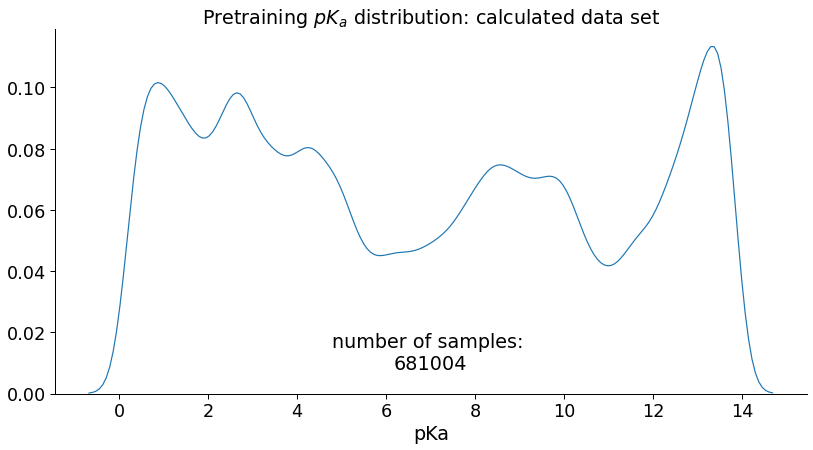

In [74]:
plot_dist(calculated_pka, 0.2, 13.8, "calculated data set")

2.0
11.99


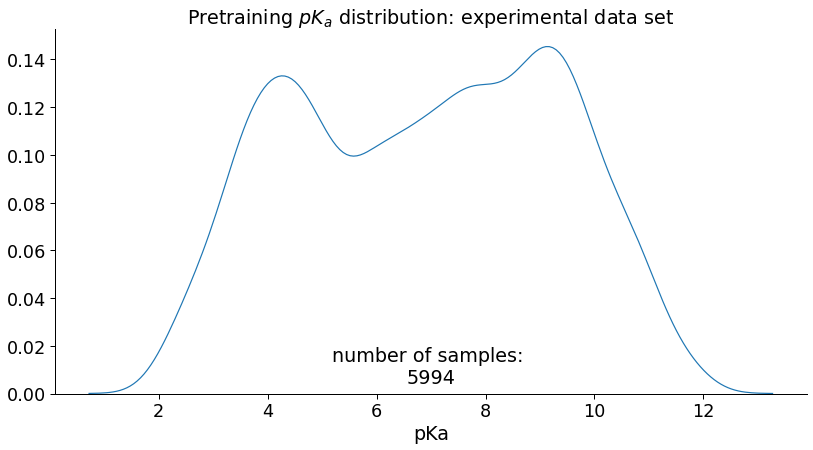

In [75]:
plot_dist(pkas, 0.2, 13.8, "experimental data set")
print(pka_array.min())
print(pka_array.max())